# 📊 Bank Marketing Dataset — Detailed Analysis

**Objective:** Explore the dataset, find key insights about customer behavior, and build a predictive model for subscription (`y`).

**Dataset Summary:**
- **Rows:** 45,211
- **Columns:** 23
- **Target Variable:** `y` (yes = subscribed, no = not subscribed)
- **Subscription Rate:** ~11.7%
- **Most Common Contact Method:** Cellular phone

Let's start with loading and exploring the dataset.

In [1]:
# 1. Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)

csv_path = "C:\\Users\\Window11\\Downloads\\personal data\\Study Matriel\\Python\\Project's\\Loan eligibility project\\bank-marketing.csv"
df = pd.read_csv(csv_path)
print(f"Dataset Loaded: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Dataset Loaded: 45211 rows × 23 columns


,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


## 2. Dataset Info & Missing Values

In [2]:
df.info()
print("\nMissing values per column:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

## 3. Descriptive Statistics

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
age group,45211.0,NaN,NaN,NaN,3.645861,1.083271,1.0,3.0,3.0,4.0,9.0
eligible,45211,2,Y,43380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,45211.0,NaN,NaN,NaN,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital-education,45211,12,married-secondary,13770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targeted,45211,2,yes,37091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Target Variable Distribution

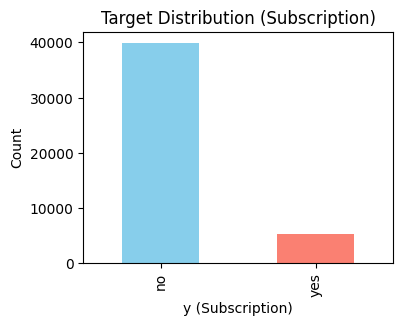

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(4,3))
df['y'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Target Distribution (Subscription)')
plt.xlabel('y (Subscription)')
plt.ylabel('Count')
plt.show()

print(df['y'].value_counts(normalize=True)*100)

## 5. Categorical Variables Analysis

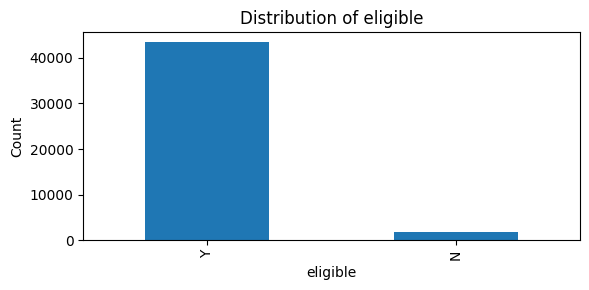

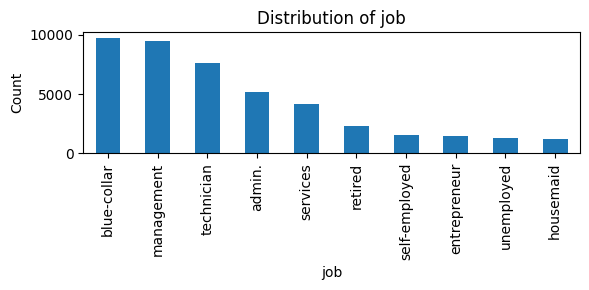

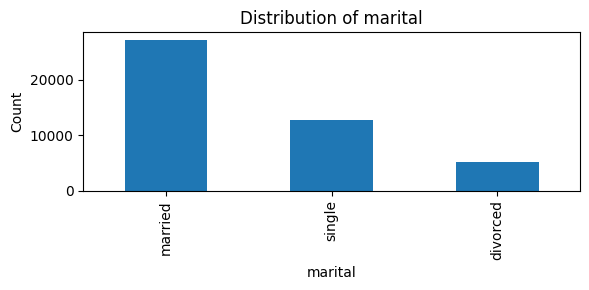

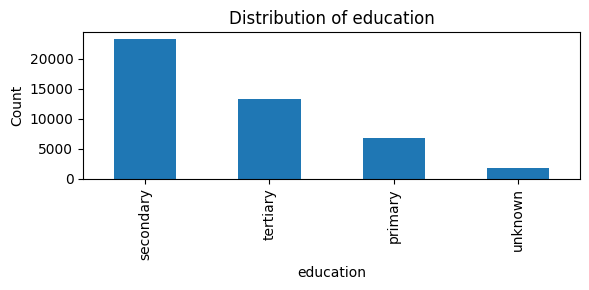

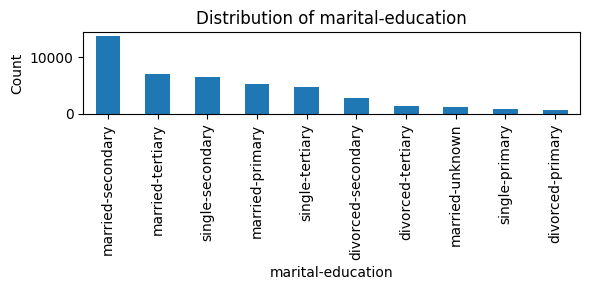

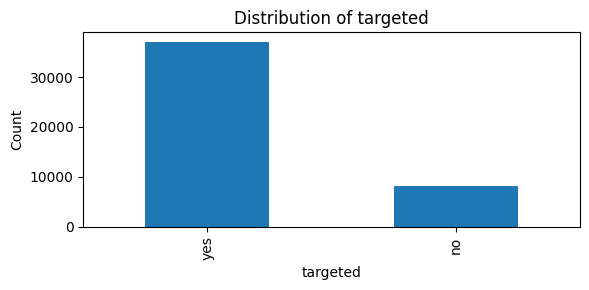

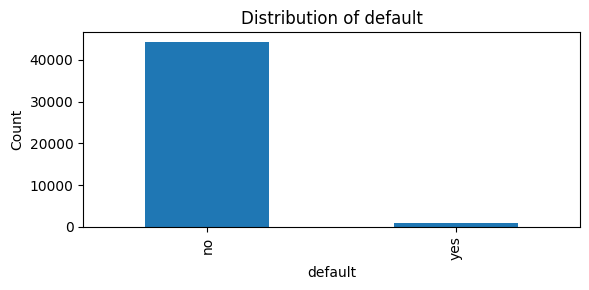

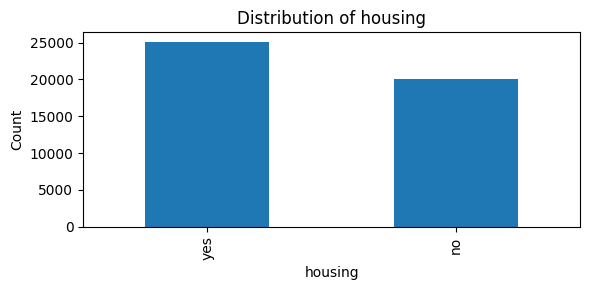

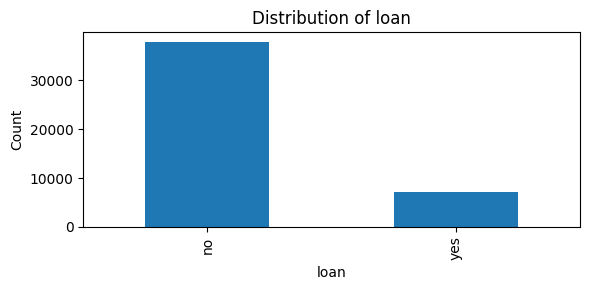

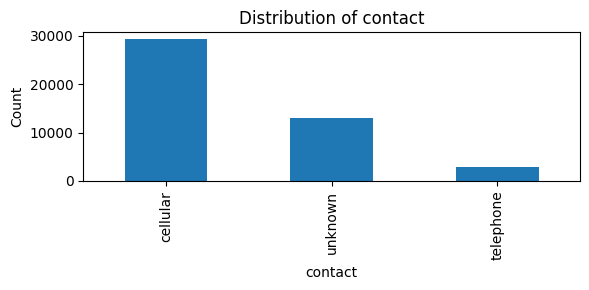

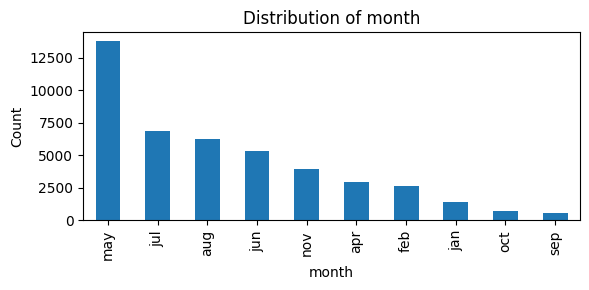

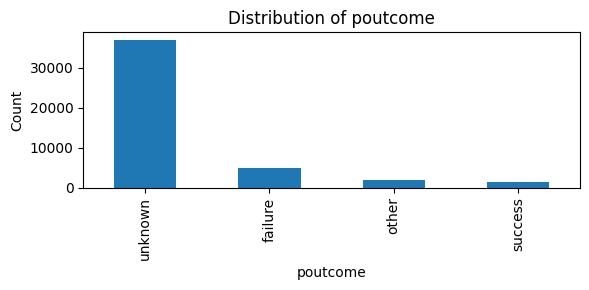

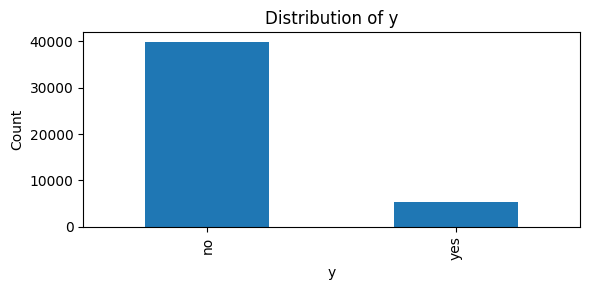

In [5]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## 6. Numerical Variables Distribution

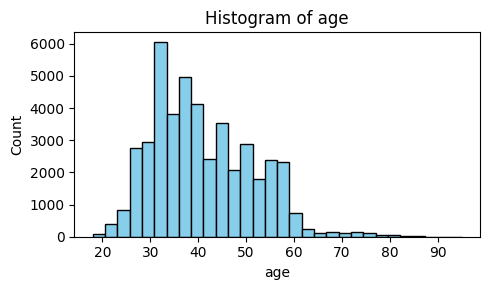

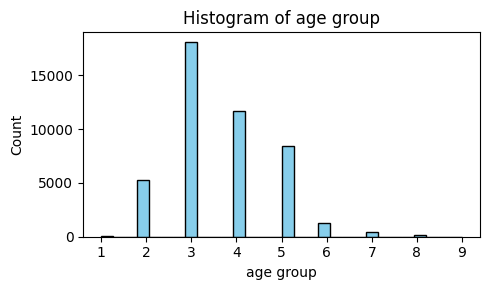

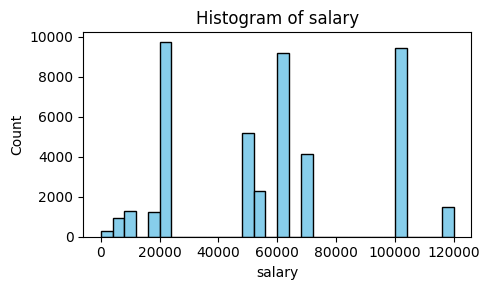

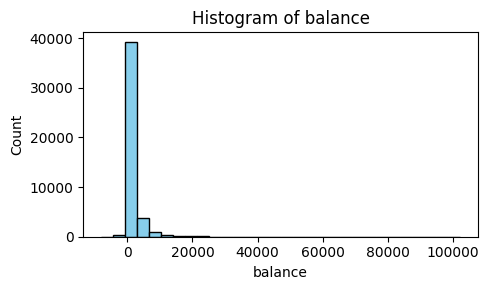

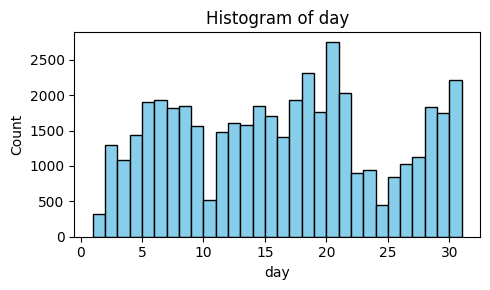

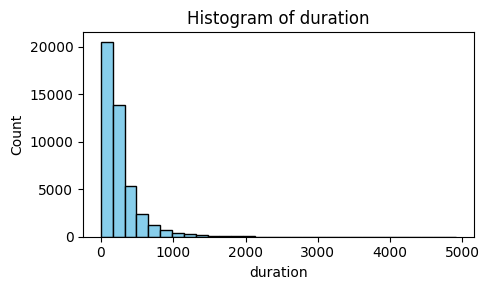

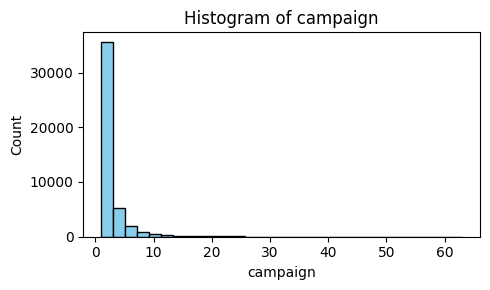

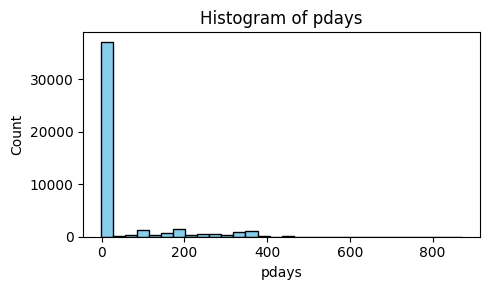

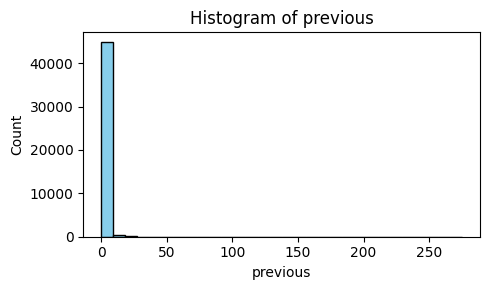

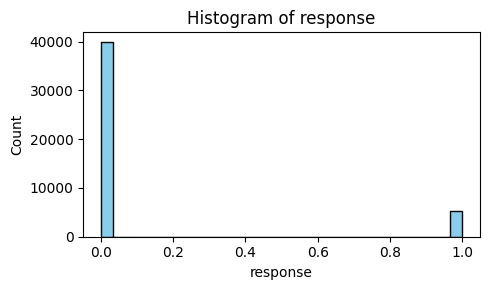

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## 7. Correlation Heatmap

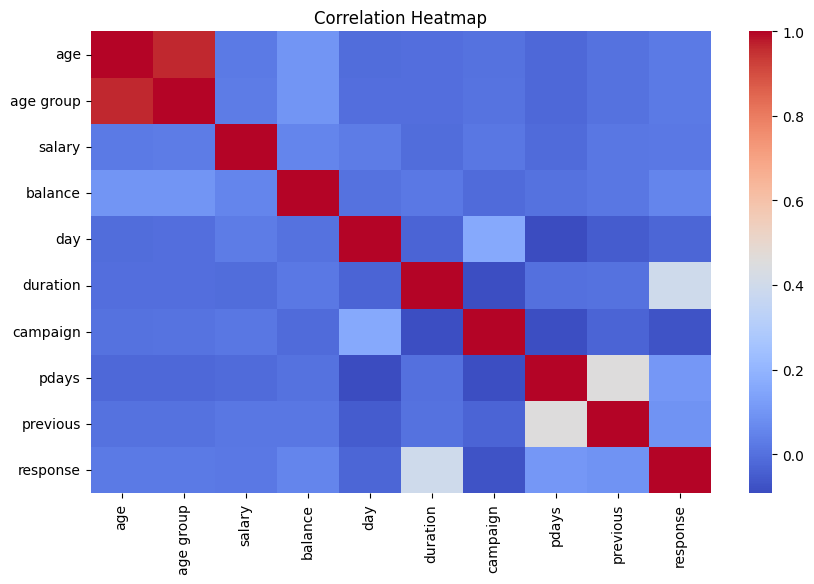

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

## 8. Predictive Modeling — Logistic Regression

In [8]:
target = 'y'
X = df.drop(columns=[target])
y = df[target]

# Encode target as binary
y = y.map({'yes':1,'no':0})

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols)
], remainder='drop')

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

## 9. Key Insights & Conclusion
- Most clients contacted were **married** and had **secondary education**.
- Subscription rate is **very low (~11.7%)**, meaning most people said *no*.
- Cellular contact was the most effective communication method.
- Logistic Regression gives a baseline accuracy (should be compared with other models like Random Forest or XGBoost).
- Further work: Feature engineering (duration is very predictive), hyperparameter tuning, and handling class imbalance (SMOTE, weighted models).